In [1]:
%pylab inline
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import fetch_olivetti_faces

#Import the face dataset
faces = fetch_olivetti_faces()

In [3]:
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)


In [4]:
print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))

1.0
0.0
0.5470426


In [5]:
def print_faces(images, target, top_n):
    # Set the size of the images by inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # Graph the images in a matrix of 20x20 
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # label the images with the target value (target value) 
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

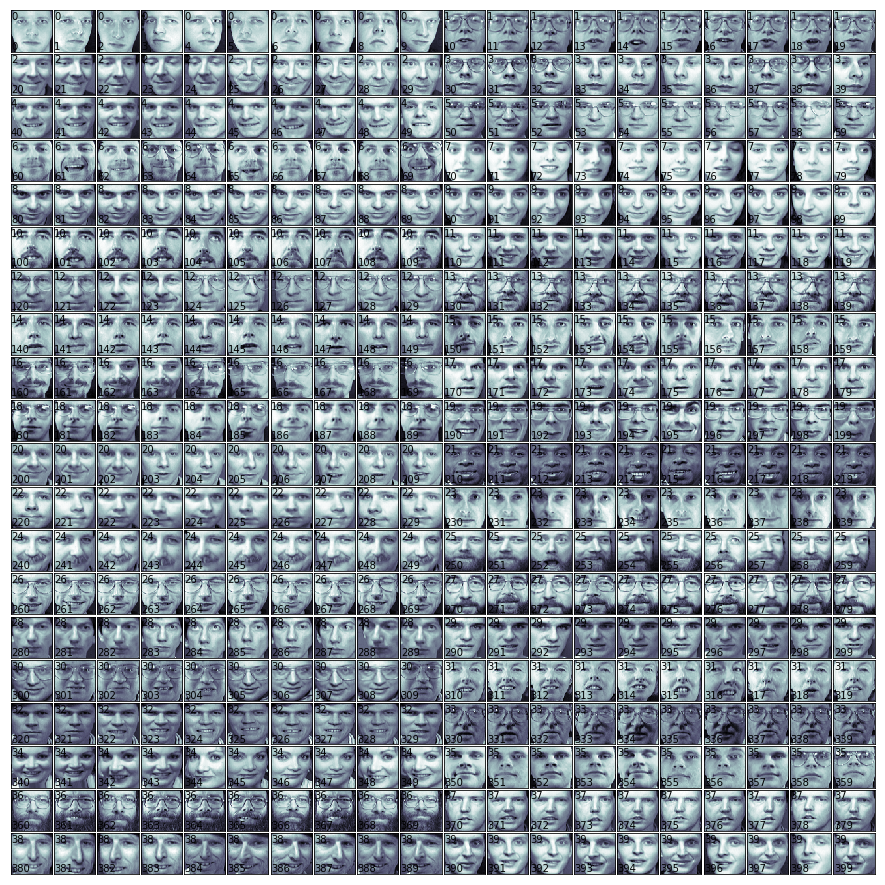

In [6]:
print_faces(faces.images, faces.target, 400)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, criterion='gini')
print(rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


In [8]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, faces.target, test_size=0.25, random_state=42)

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # Create a k-fold croos validation iterator 
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # Default the used score is returned by the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores)))

In [10]:
evaluate_cross_validation(rf, X_train, y_train, 5)

[0.88333333 0.9        0.85       0.83333333 0.93333333]
Mean score: 0.880 (+/-0.018)


In [11]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print("Accuracy training set:")
    print(clf.score(X_train, y_train))
    print("Accuracy testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
    
    print("Classifier Report:")
    print(metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

In [12]:
train_and_evaluate(rf, X_train, X_test, y_train, y_test)

Accuracy training set:
1.0
Accuracy testing set:
0.87
Out-of-bag score estimate: 0.873
Classifier Report:
             precision    recall  f1-score   support

          0       1.00      0.75      0.86         4
          1       1.00      1.00      1.00         2
          2       0.67      1.00      0.80         2
          3       1.00      1.00      1.00         4
          4       0.67      0.67      0.67         3
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         1
          7       1.00      0.29      0.44         7
          8       0.67      1.00      0.80         2
          9       1.00      1.00      1.00         3
         10       0.75      1.00      0.86         3
         11       1.00      0.75      0.86         4
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         3
         15       1.00      1.00      1.00   

c:\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [13]:
import numpy as np

X_train=np.array(X_train)
X_test=np.array(X_test)
y_pred = rf.predict(X_test)

print(y_test)
print(y_pred)

e_faces=[np.reshape(b, (64,64)) for b in X_test]
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]

for i in range(len(y_test)):
    #k=print_faces(e_faces,y_test,i)
    #m=print_faces(eval_faces, y_pred,i)
    if y_pred[i]==y_test[i]:
        print('True')
    else:
        print('False')

[20 28  3 21  9  8 32  9 26 12  0 36  5  7 13  4 27 37 23 38  7  1 39 27
  0 39 11 22 26 10 39 19 26  5 23 11 11 34 15 14 38  5  7  2  8 38 14 18
  2 17  4 32 33  7 37  3 22 17  3 15 12 29 25  7 10  3 35 26 39  7 32 14
  0  4 38 24 22 36 17 28  0  1 20 25 27  6 24 30 10  9 23 33 11 22 18 31
 37 38 23  7]
[20 28  3 21  9  8 32  9 26 12  0 36  5  7 13  4 19 37 23 38  7  1 39 25
  0 39 11 22 26 10 39 19 26  5 23 11  8 34 15 14 38  5 31  2  8 38 14 18
  2 17 39 32 33 10 37  3 24 17  3 15 12 29  2 17 10  3 35 26  4 38 32 14
  0  4 38 24 22 36 17 28 16  1 20 25 27  6 24 30 10  9 23 33 11 22 18 31
 37 38 23 17]
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
False
True
True
True
True
True
True
True
False
True
True
False
True
True
False
True
True
True
True
True
False
False
True
True
True
True
False
False
True
True
True
True
True
Tr